<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter 
# <center> Выполнил Артиков Артур, студент потока DST - 156 
   

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
hh_vacancy_df = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

In [4]:
print(f'Размерность таблицы - {hh_vacancy_df.shape}')

Размерность таблицы - (44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [5]:
display(hh_vacancy_df.head())
# Порядок слов в признаке "Пол, возраст" имеет вид: <Пол, возраст, дата рождения>

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [6]:
hh_vacancy_df.info()
# Все столбцы имеют тип данных - object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [7]:
columns_null_percent = hh_vacancy_df.isnull().mean() * 100 # Считаем среднее число пропусков
cols_with_null = columns_null_percent[columns_null_percent>0].sort_values(ascending=False)
display(cols_with_null)     # Выводим столбцы, в которых есть пропуски

Опыт работы                        0.375469
Последняя/нынешняя должность       0.004470
Последнее/нынешнее место работы    0.002235
dtype: float64

5. Выведите основную статистическую информацию о столбцах.


In [8]:
data_unique = hh_vacancy_df.nunique()       # Посчитаем число уникальных значений для каждого столбца
display(data_unique)
# В столбце "Опыт работы" содержится 44413 уникальных значений

Пол, возраст                       16003
ЗП                                   690
Ищет работу на должность:          14929
Город, переезд, командировки       10063
Занятость                             38
График                                47
Опыт работы                        44413
Последнее/нынешнее место работы    30214
Последняя/нынешняя должность       16927
Образование и ВУЗ                  40148
Обновление резюме                  18838
Авто                                   2
dtype: int64

In [9]:
# Какая из искомых должностей самая распространённая? Введите название.
hh_vacancy_df[['Ищет работу на должность:']].value_counts(ascending=False)

Ищет работу на должность:                           
Системный администратор                                 3099
Инженер                                                  966
Аналитик                                                 809
Менеджер проектов                                        745
Руководитель проекта                                     718
                                                        ... 
Инженер радиотехник                                        1
Инженер радиотехники, электроники и телекоммуникации       1
Инженер радиоэлектронных систем                            1
Инженер радиоэлектронных систем и комплексов               1
📈 SEO-специалист / маркетолог / руководитель проекта       1
Name: count, Length: 14929, dtype: int64

# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [10]:
hh_vacancy_df['Образование'] = hh_vacancy_df['Образование и ВУЗ'].apply(lambda x: ' '.join(x.split()[:2]).replace('образование', ''))
display(hh_vacancy_df['Образование'].value_counts())
hh_vacancy_df = hh_vacancy_df.drop(['Образование и ВУЗ'], axis=1)
display(hh_vacancy_df.head())

Образование
Высшее                 33863
Среднее специальное     5765
Неоконченное высшее     4557
Среднее                  559
Name: count, dtype: int64

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [11]:
hh_vacancy_df['Возраст'] = hh_vacancy_df['Пол, возраст'].apply(lambda x: int(x.split(',')[1].split()[0]))
print('Средний возраст соискателей - ', round(hh_vacancy_df['Возраст'].mean(), 2))

hh_vacancy_df['Пол'] = hh_vacancy_df['Пол, возраст'].apply(lambda x: str(x.split(',')[0])[0])
display(hh_vacancy_df['Пол'].value_counts(normalize=True))

Средний возраст соискателей -  32.2


Пол
М    0.809293
Ж    0.190707
Name: proportion, dtype: float64

In [12]:
hh_vacancy_df = hh_vacancy_df.drop(['Пол, возраст'], axis=1)
display(hh_vacancy_df.head())

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Возраст,Пол
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,39,М
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,60,М
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,36,Ж
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,38,М
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,26,Ж


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [13]:
def expierence(data):
    if data is np.nan or data == 'Не указано':
        return np.nan
    else:
        time = data.split('  ')[0].split()[2:]
        if len(time) == 4:
            return int(time[0])*12 + int(time[2])
        elif len(time) == 2 and time[1].startswith('месяц'):
            return int(time[0])
        elif len(time) == 2 and time[1] != 'месяц' or time[1] != 'месяца':
            return int(time[0]) * 12

hh_vacancy_df['Опыт работы (месяц)'] = hh_vacancy_df['Опыт работы'].apply(expierence)
print('Медианный опыт работы в месяцах - ', hh_vacancy_df['Опыт работы (месяц)'].median())

Медианный опыт работы в месяцах -  100.0


In [14]:
hh_vacancy_df = hh_vacancy_df.drop(['Опыт работы'], axis=1)
display(hh_vacancy_df.head())

,ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Возраст,Пол,Опыт работы (месяц)
0,29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,39,М,202.0
1,40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,60,М,233.0
2,20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,36,Ж,123.0
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,38,М,225.0
4,140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,26,Ж,67.0


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [15]:
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград' ]
def city(data):
    data = data.split()[0]
    if data == 'Москва' or data == 'Санкт-Петербург' or data in million_cities:
        return data
    else:
        return 'другие'

hh_vacancy_df['Город'] = hh_vacancy_df['Город, переезд, командировки'].apply(city)
hh_vacancy_df['Готовность к переезду'] = hh_vacancy_df['Город, переезд, командировки'].apply(lambda x: False if 'не' in x.split(' , ')[-2] else True)
hh_vacancy_df['Готовность к командировкам'] = hh_vacancy_df['Город, переезд, командировки'].apply(lambda x: False if 'не' in x.split(' , ')[-1] else True)

hh_vacancy_df = hh_vacancy_df.drop(['Город, переезд, командировки'], axis=1)
display(hh_vacancy_df.head())


,ЗП,Ищет работу на должность:,Занятость,График,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Возраст,Пол,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам
0,29000 руб.,Системный администратор,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...","МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,39,М,202.0,другие,False,False
1,40000 руб.,Технический писатель,"частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,60,М,233.0,другие,False,True
2,20000 руб.,Оператор,полная занятость,полный день,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,36,Ж,123.0,другие,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,38,М,225.0,другие,False,True
4,140000 руб.,Региональный менеджер по продажам,полная занятость,полный день,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,26,Ж,67.0,Москва,False,True


In [16]:
display(hh_vacancy_df['Город'].value_counts(normalize=True))
display(hh_vacancy_df[['Готовность к переезду', 'Готовность к командировкам']].value_counts(normalize=True))

Город
Москва             0.371469
другие             0.367692
Санкт-Петербург    0.110339
Новосибирск        0.021411
Казань             0.019489
Екатеринбург       0.016404
Самара             0.015712
Ростов-на-Дону     0.013566
Уфа                0.012627
Воронеж            0.012024
Пермь              0.009945
Красноярск         0.009096
Челябинск          0.007375
Омск               0.006772
Волгоград          0.006079
Name: proportion, dtype: float64

Готовность к переезду  Готовность к командировкам
False                  True                          0.391002
True                   True                          0.317450
False                  False                         0.253576
True                   False                         0.037972
Name: proportion, dtype: float64

5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [17]:
list_of_work = ['полная занятость', 'частичная занятость', 'проектная работа', 'волонтерство', 'стажировка']
for element in list_of_work:
    hh_vacancy_df[element] = hh_vacancy_df['Занятость'].apply(lambda x: True if element in x else False)

list_of_worktype = ['полный день', 'сменный график', 'гибкий график', 'удалённая работа', 'вахтовый метод']
for element in list_of_worktype:
    hh_vacancy_df[element] = hh_vacancy_df['График'].apply(lambda x: True if element in x else False)

hh_vacancy_df = hh_vacancy_df.drop(['Занятость', 'График'], axis=1)
display(hh_vacancy_df.head())

,ЗП,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Возраст,Пол,Опыт работы (месяц),...,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод
0,29000 руб.,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,Неоконченное высшее,39,М,202.0,...,True,True,True,False,False,True,True,True,False,True
1,40000 руб.,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,Высшее,60,М,233.0,...,True,True,True,False,False,True,True,True,False,False
2,20000 руб.,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,Среднее специальное,36,Ж,123.0,...,True,False,False,False,False,True,False,False,False,False
3,100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,Высшее,38,М,225.0,...,True,True,True,False,False,False,False,True,False,False
4,140000 руб.,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,Высшее,26,Ж,67.0,...,True,False,False,False,False,True,False,False,False,False


In [18]:
display(hh_vacancy_df[['вахтовый метод', 'гибкий график']].value_counts())
display(hh_vacancy_df[['проектная работа', 'волонтерство']].value_counts())

вахтовый метод  гибкий график
False           False            28387
                True             13273
True            True              2311
                False              773
Name: count, dtype: int64

проектная работа  волонтерство
False             False           36626
True              False            7632
                  True              436
False             True               50
Name: count, dtype: int64

6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [19]:
exchange = pd.read_csv('data/ExchangeRates.csv', sep=',')           # считываем файл, содержащий курс валют
exchange = exchange.drop(['per','time', 'vol'], axis=1)             # удаляем ненужные столбцы

hh_vacancy_df['Обновление резюме'] = hh_vacancy_df['Обновление резюме'].apply(lambda x: x.split()[0])          # выделяем из даты обновления только дату, исключая время
hh_vacancy_df['Обновление резюме'] = pd.to_datetime(hh_vacancy_df['Обновление резюме'], dayfirst=True).dt.date # переводим в формат datetime
exchange['date'] = pd.to_datetime(exchange['date'], dayfirst=True).dt.date                                     # переводим дату в exchange в формат datetime


hh_vacancy_df['Сумма ЗП'] = hh_vacancy_df['ЗП'].apply(lambda x: int(x.split()[0]))              # получаем сумму ЗП в цифре (без учета валюты)
hh_vacancy_df['Исходная валюта ЗП'] = hh_vacancy_df['ЗП'].apply(lambda x: x.split()[1])         # получаем валюту ЗП

iso_exchange = {'грн.': 'UAH', 'бел.руб.': 'BYN', 'сум': 'AZN', }                               # создаем словарь, содержащий валюты, имеющих разные ISO и значения в таблице

for element in hh_vacancy_df['Исходная валюта ЗП']:
    if element in iso_exchange:
        hh_vacancy_df['Исходная валюта ЗП'] = hh_vacancy_df['Исходная валюта ЗП'].replace(element, iso_exchange[element])       # заменяем неправильные обозначения на верные
    else:
        continue
    
result_vaccancy_df = hh_vacancy_df.merge(exchange, left_on=['Исходная валюта ЗП', 'Обновление резюме'], right_on=['currency', 'date'], how='outer')     # объединяем датафреймы
result_vaccancy_df['close'] = result_vaccancy_df['close'].replace(np.nan, 1)                    # меняем значение закрытой суммы с NaN на 1 - нужно только для рубля
result_vaccancy_df['proportion'] = result_vaccancy_df['proportion'].replace(np.nan, 1)          # меняем значение пропорции для рубля с NaN на 1

result_vaccancy_df['ЗП (руб)'] = result_vaccancy_df['Сумма ЗП']*result_vaccancy_df['close'] / result_vaccancy_df['proportion']      # считаем зарплату для каждого значения
print('Желаемая медианная зарплата в рублях: ', round(result_vaccancy_df['ЗП (руб)'].median()))        # получаем медианну зарплату

C:\Users\Artur\AppData\Local\Temp\ipykernel_11464\1185896294.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange['date'] = pd.to_datetime(exchange['date'], dayfirst=True).dt.date                                     # переводим дату в exchange в формат datetime


Желаемая медианная зарплата в рублях:  59080


In [20]:
result_vaccancy_df = result_vaccancy_df.drop(['ЗП', 'Сумма ЗП', 'Исходная валюта ЗП',	'currency', 'date', 'close', 'proportion'], axis=1)     # удалем ненужные столбцы
result_vaccancy_df = result_vaccancy_df.dropna(thresh=1) 
display(result_vaccancy_df.head())          # проверяем наличие нужных столбцов в датафрейме

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Возраст,Пол,Опыт работы (месяц),Город,...,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удалённая работа,вахтовый метод,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,2019-04-16,Имеется собственный автомобиль,Неоконченное высшее,39.0,М,202.0,другие,...,True,True,False,False,True,True,True,False,True,29000.0
1,Оператор,ПАО Сбербанк,Кассир-операционист,2019-04-16,Не указано,Среднее специальное,36.0,Ж,123.0,другие,...,False,False,False,False,True,False,False,False,False,20000.0
2,SMM-менеджер/ SEO/ creator,ГРУППА ИМА,SMM-менеджер/ SEO,2019-04-16,Не указано,Высшее,27.0,Ж,83.0,Москва,...,False,False,False,False,False,False,False,False,False,90000.0
3,Главный инженер проекта,"ООО ""Локальные сети""",Главный инженер,2019-04-16,Не указано,Высшее,29.0,М,125.0,Москва,...,True,True,False,False,True,True,True,False,True,180000.0
4,Руководитель проектов,"ООО ""Полимедиа-РЕГИОН""",Руководитель проектов (срочный трудовой догово...,2019-04-16,Не указано,Высшее,44.0,М,93.0,Санкт-Петербург,...,False,False,False,False,True,False,False,False,False,80000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

In [21]:
hh_df = pd.read_csv('data/hh_database_preprocessed.csv', sep=',') # импортируем dataframe с зарплатой в рублях

Модальное значение возраста сосикателей -  0    30
Name: Возраст, dtype: int64


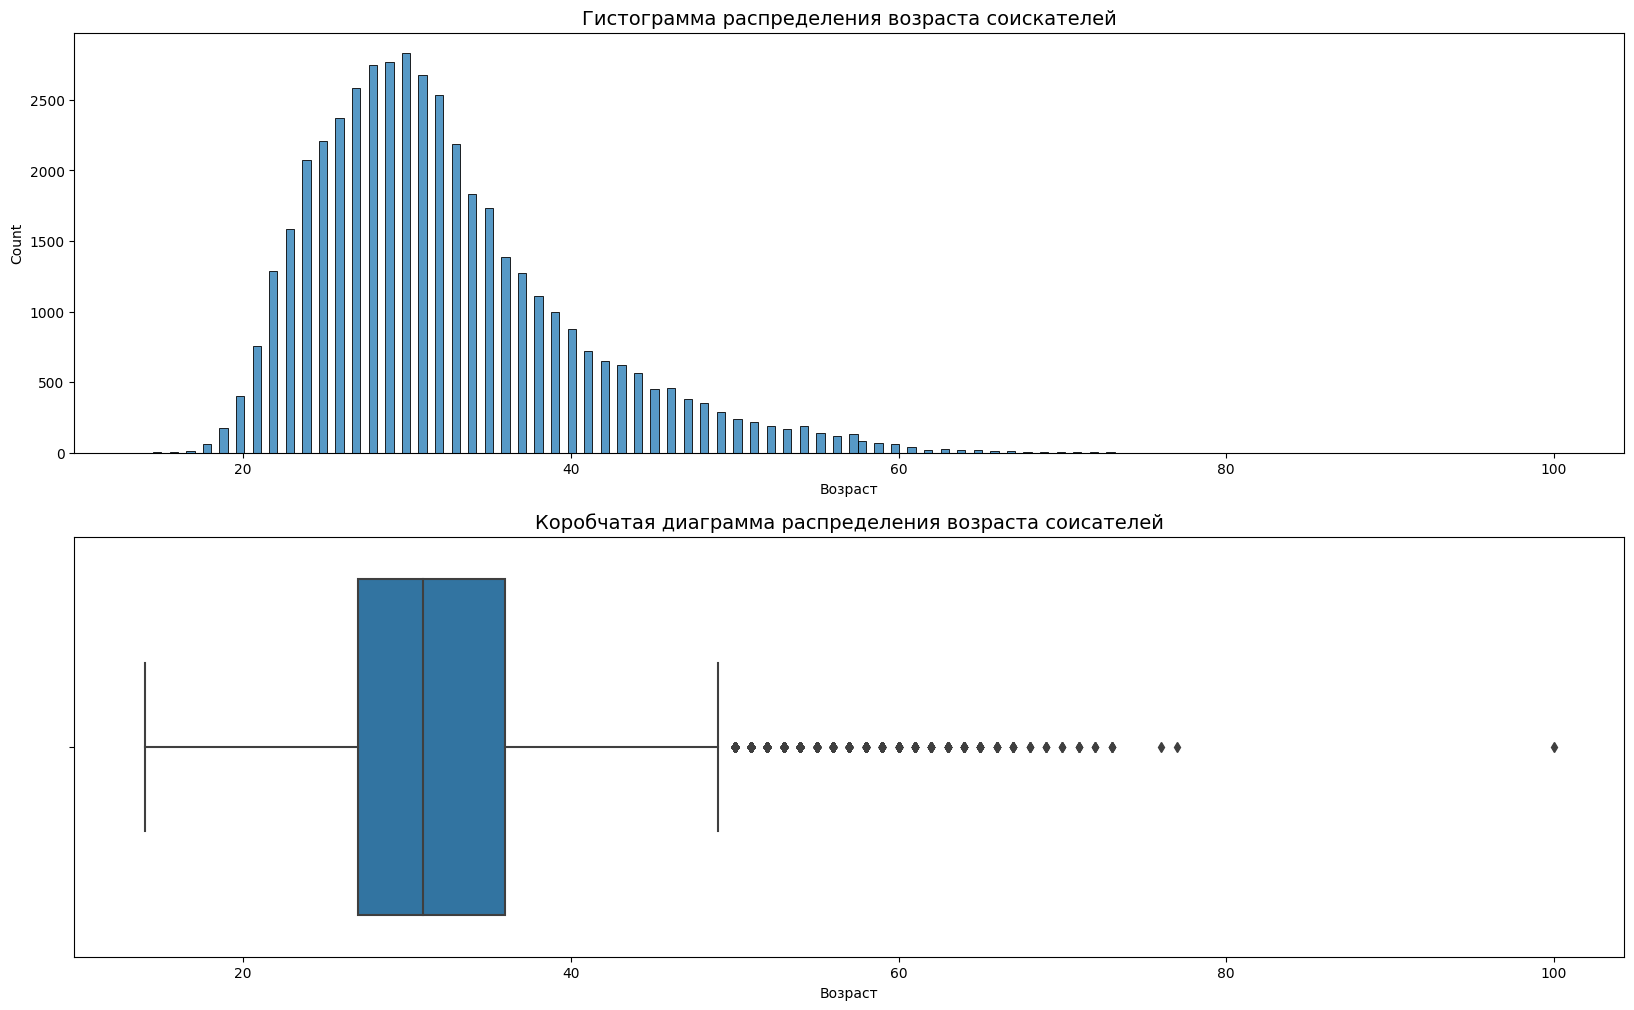

In [22]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 12))
axes[0].set_title('Гистограмма распределения возраста соискателей', fontsize=14)
histplot = sns.histplot(data=hh_df,
             x='Возраст',
             ax=axes[0]    
);

axes[1].set_title('Коробчатая диаграмма распределения возраста соисателей', fontsize=14)
boxplot = sns.boxplot(data=hh_df, 
            x='Возраст', 
            ax=axes[1]
);
print("Модальное значение возраста сосикателей - ", hh_df['Возраст'].mode())

## Выводы по графе "Возраст" (Задание 1)
Как видно из коробчатой диаграммы, модальное значение возраста соискателей - 30-31 год (при использовании функции mode() результат был равен 30 годам). Также по коробчатой диаграмме удалось установить, что возраст большинства соискателей находится в диапазоне от 27 до 36 лет. Среди людей, ищущих вакансии присутствуют люди с возрастом до 78-80 лет. Отдельно стоит указать наличие выбросов в графе "Возраст". Судя по коробчатой диаграмме есть как минимум 1 человек, возраст которого - 100 лет. Крайне маловероятно, что человек в таком возрасте будет искать работу программистом. Дополнительно хочется указать на немного смазанную нижнюю границу. Судя по гистограмме есть соискатели 15 и даже 14-летнего возрастов. Крайне маловероятно, что данные соискатели смогут найти работу, поскольку в соответствии с стьей 63 ТК РФ заключение трудового договора возможно только с возраста шестнадцати лет.

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

Максимальный опыт работы в месяцах -  1188.0


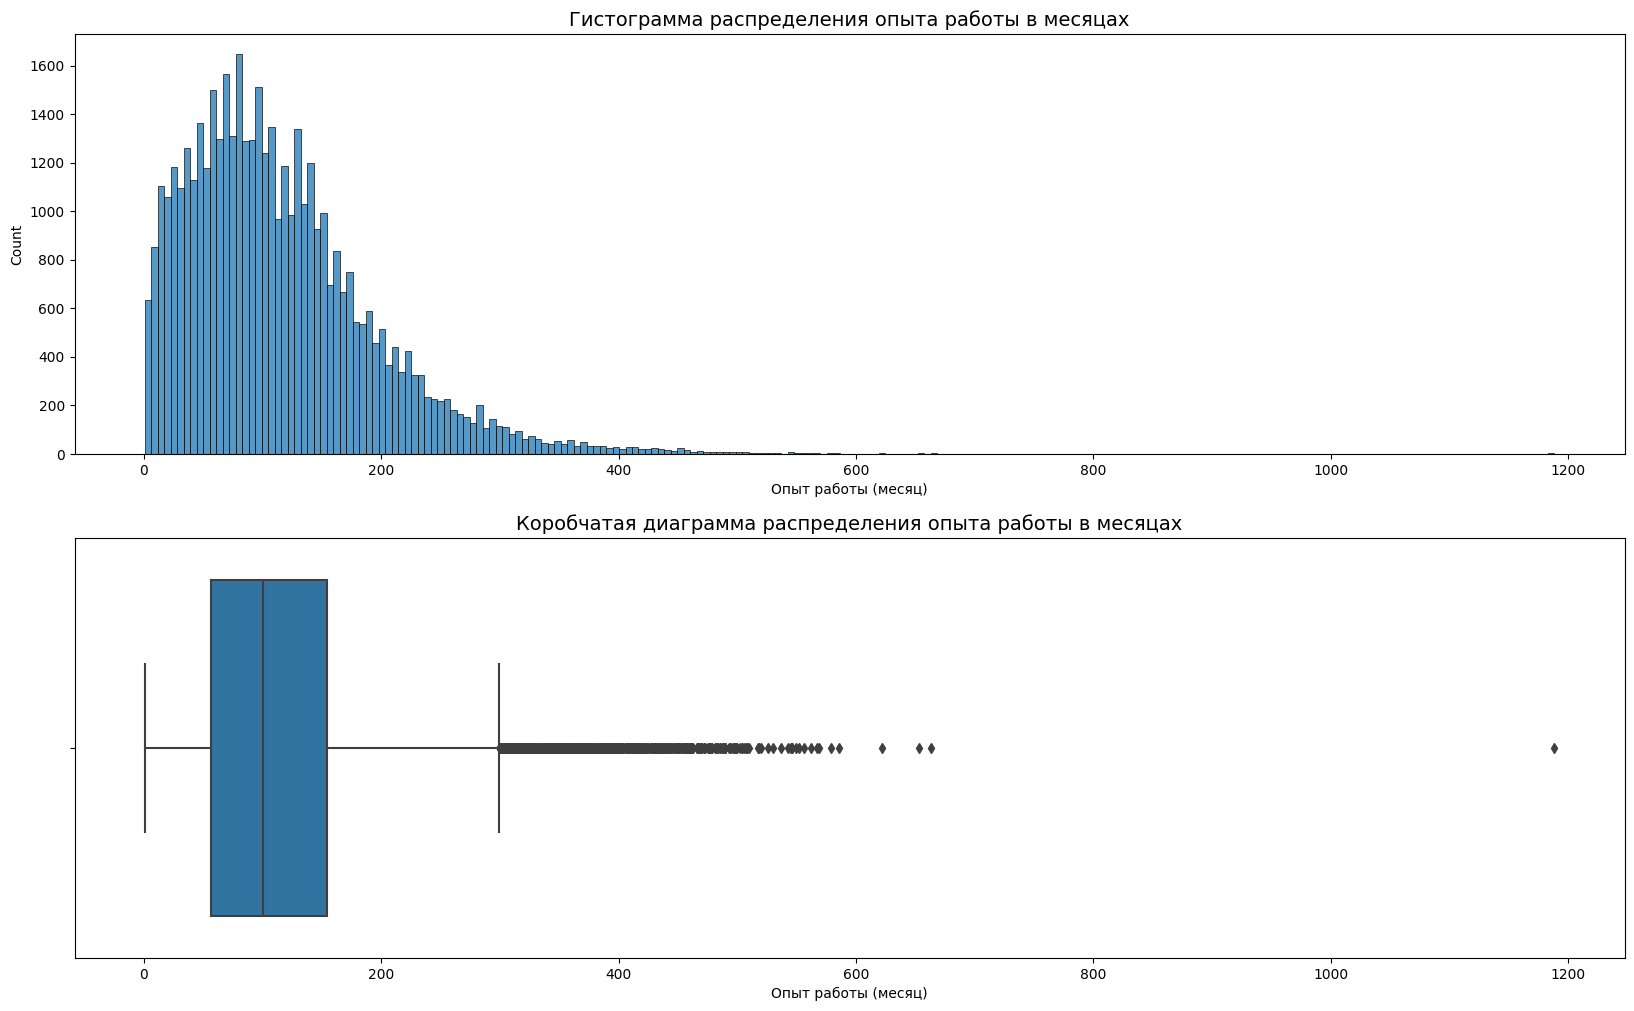

In [23]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (20, 12))

axes[0].set_title('Гистограмма распределения опыта работы в месяцах', fontsize=14)
histplot = sns.histplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    ax=axes[0]
);

axes[1].set_title('Коробчатая диаграмма распределения опыта работы в месяцах', fontsize=14)
boxplot = sns.boxplot(
    data=hh_df,
    x='Опыт работы (месяц)',
    ax=axes[1]
);

print('Максимальный опыт работы в месяцах - ', hh_df['Опыт работы (месяц)'].max())

## Вывод по графе "Опыт работы (месяц)" (Задание 2)

Как видно из гистограммы, мода распределения опыта работы в месяцах находится чуть левее 100 месяцев. То есть можно сделать вывод о том, что средний сосискатель имеет опыт работы 80-90 месяцев (при поиске с помощью функции mode() получилось значение 81 месяц). Значения данного признака лежат в диапазоне от 0 до примерно 300 месяцев. Число сосикателей имеющих опыт работы более 300 месяцев считаются программой за выбросы. Это легко объяснить с логической точки зрения, ведь опыт работы в 300 месяцев означает опыт работы в 300/12 = 25 лет, что является достаточно большим значением и означает, что соискатель начал свою карьеру программиста в 1998-2001 годах. Опыт работы большинства соискателей лежит в диапазоне от 50 до 150 месяцев (от 4,1(6) до 12,5 лет). Присутствуют выбросы в виде опыта работы более 600 месяцев. Легко понять, что при опыте в 600 месяцев соискатель будет иметь опыт работы в 50 лет. Если предположить, что соискатель начал работать в 18 лет, то сейчас ему будет 68 лет (пенсионный возраст независимо от пола). Особенно выделяется опыт работы в 1188 месяцев, то есть в 99 лет. Скорее всего этот выброс принадлежит тому же соискателю, который указал в графе возраст значение более 100 лет.

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


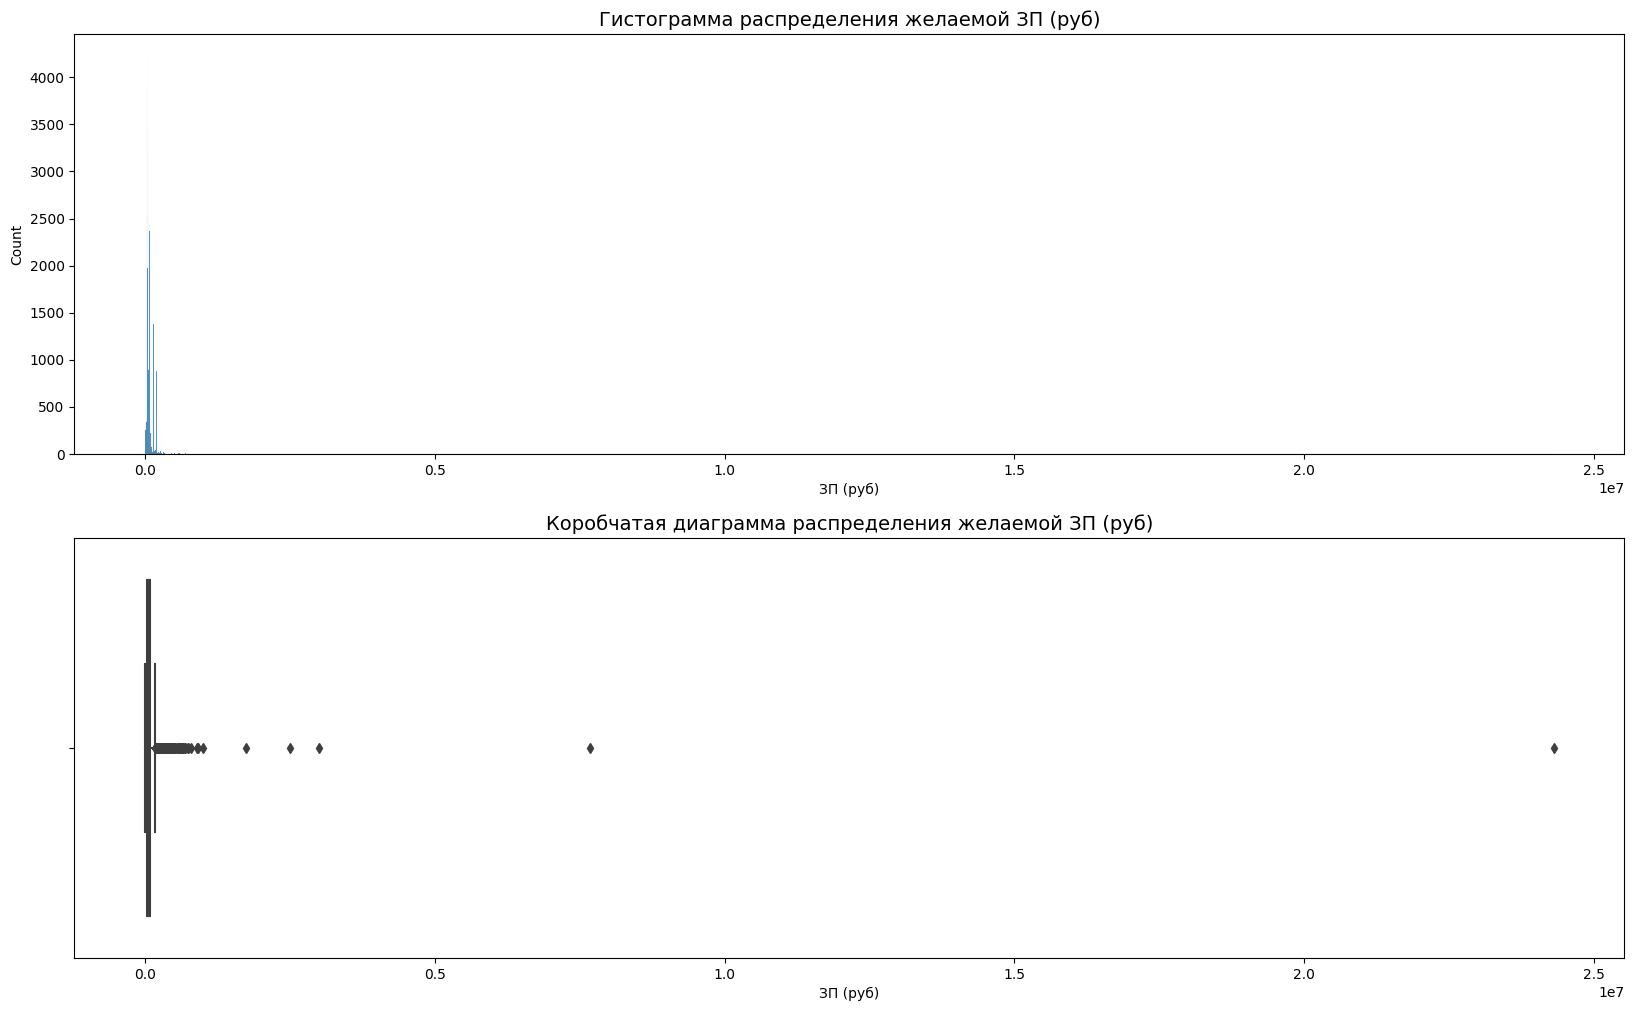

In [24]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (20, 12))

axes[0].set_title('Гистограмма распределения желаемой ЗП (руб)', fontsize=14)
histplot = sns.histplot(
    data=hh_df,
    x='ЗП (руб)',
    ax=axes[0]
);

axes[1].set_title('Коробчатая диаграмма распределения желаемой ЗП (руб)', fontsize=14)
boxplot = sns.boxplot(
    data=hh_df,
    x='ЗП (руб)',
    ax=axes[1]
);


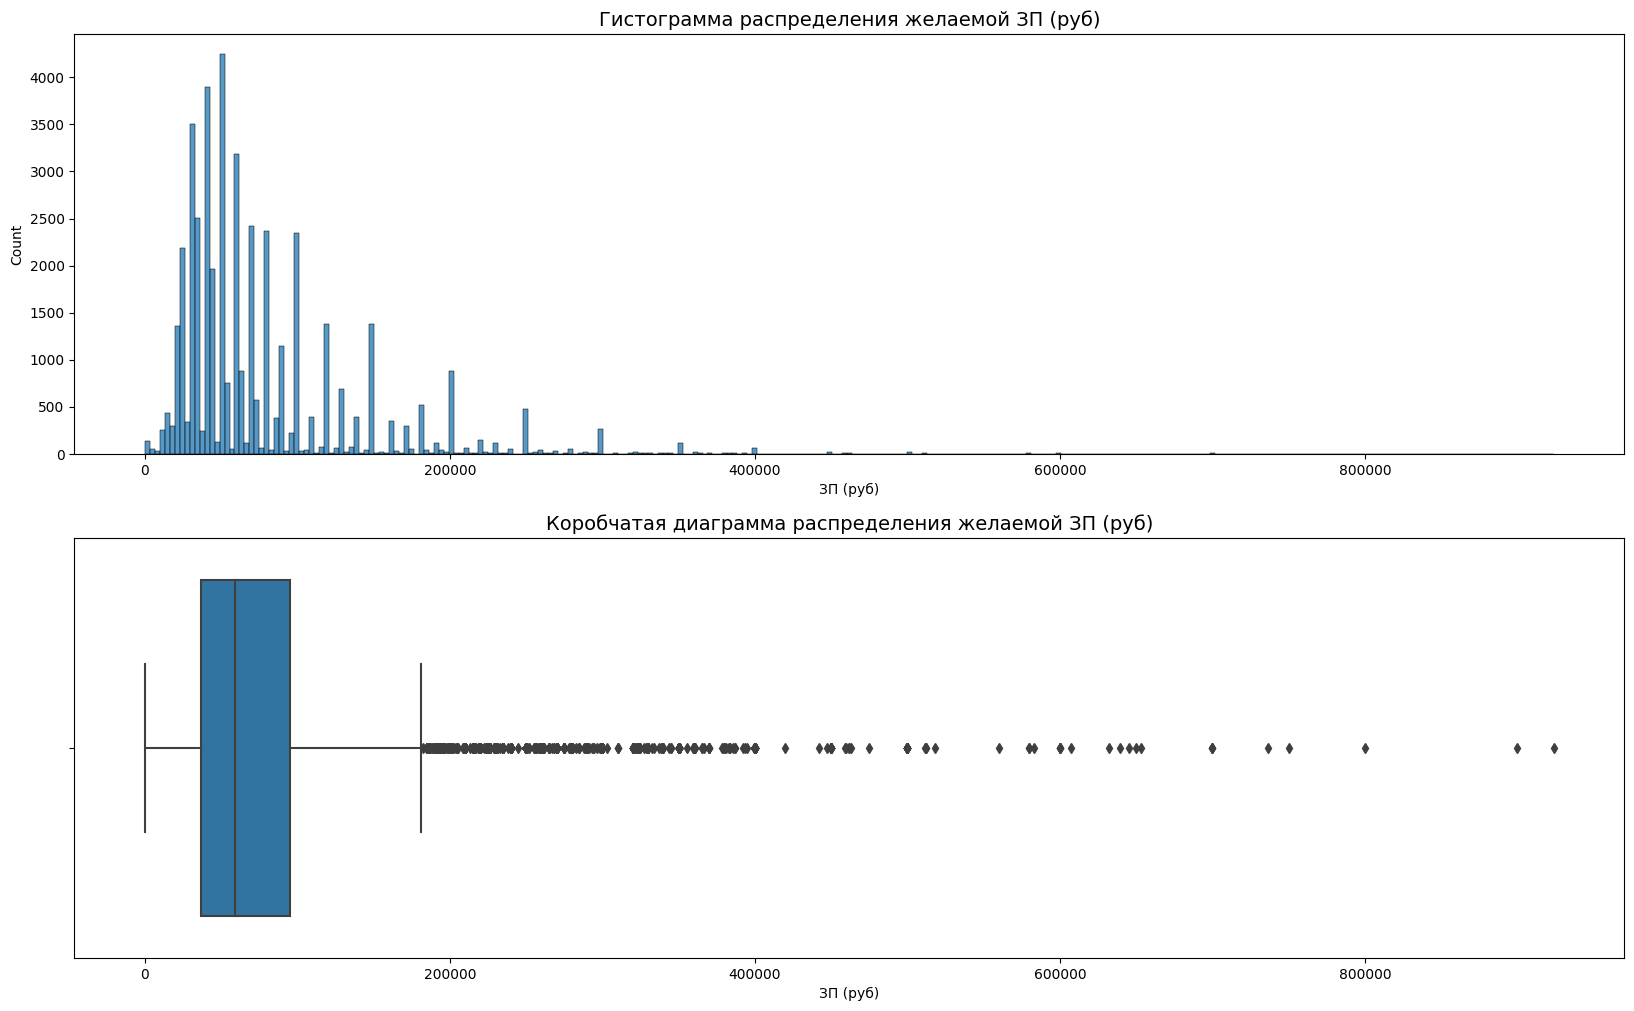

In [25]:
money_df = hh_df[hh_df['ЗП (руб)'] < 1000000]
fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (20, 12))

axes[0].set_title('Гистограмма распределения желаемой ЗП (руб)', fontsize=14)
histplot = sns.histplot(
    data=money_df,
    x='ЗП (руб)',
    ax=axes[0]
);

axes[1].set_title('Коробчатая диаграмма распределения желаемой ЗП (руб)', fontsize=14)
boxplot = sns.boxplot(
    data=money_df,
    x='ЗП (руб)',
    ax=axes[1]
);

## Вывод по графе "ЗП (руб)" (Задание 3)

Как видно из первых двух графиков, из-за наличия выбросов, значения которых более 1 млн. рублей, по графику невозможно оценить значения признака для большинства соискателей. Поэтому для более точного анализа будут использованы данные, из которых исключены значения более 1.000.000 рублей. Медианное значение желанной зарплаты - 59000 рублей. Распределение желаемых зарплат лежит в диапазоне от 0 до 200.000 рублей. Заработная плата большинства соискателей лежит в диапазоне от 30 до 110 тыс. рублей. Также видно наличие огромного количества значений, определяемых как выбросы, в диапазоне от 200 до 400 тыс. рублей. Значения более этого диапазона также считаются выбросами. Максимальная желаемая зарплата - 24 млн. рублей, является выбросом и поэтому, его будет необходимо будет устранить.

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

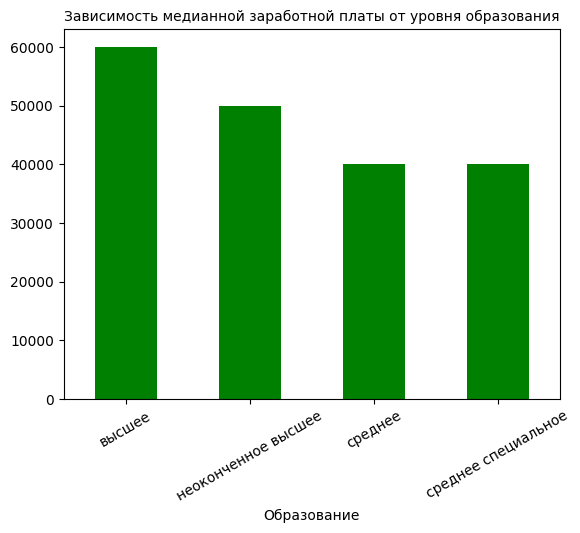

In [26]:
money_df = hh_df[hh_df['ЗП (руб)'] < 1000000]

grafic_data = money_df.groupby(['Образование'])['ЗП (руб)'].median()
figure = grafic_data.plot(
    kind='bar',
    color='green'
)
figure.xaxis.set_tick_params(rotation=30)
figure.set_title('Зависимость медианной заработной платы от уровня образования', fontsize=10);


## Вывод по зависимости медианной заработной платы от уровня образования (Задание 4)
Как видно из построенного графика, наибольшую медианную зарплату хотят получать соискатели, имеющие высшее образованиее. Наименьший уровень желаемой ЗП наблюдается у соискателей с средним, или средне-специальным уровнем образования. На основании собранных данных, можно сделать вывод, что уровень образования влияет на уровень желаемой заработной платы. Тем не менее, как показывает реальный опыт, уровень образования стоит не на первом месте по важности определения желаемой ЗП, поскольку в первую очередь оцениваются навыки и умения соискателя. Можно предположить, что данные об опыте работы будут сильнее влиять на уровень желаемой ЗП, нежели уровень образования. 

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

Text(0.5, 1.0, 'Распределение желаемой заработной платы в зависимости от города (для зарплат менее 1 млн. руб)')

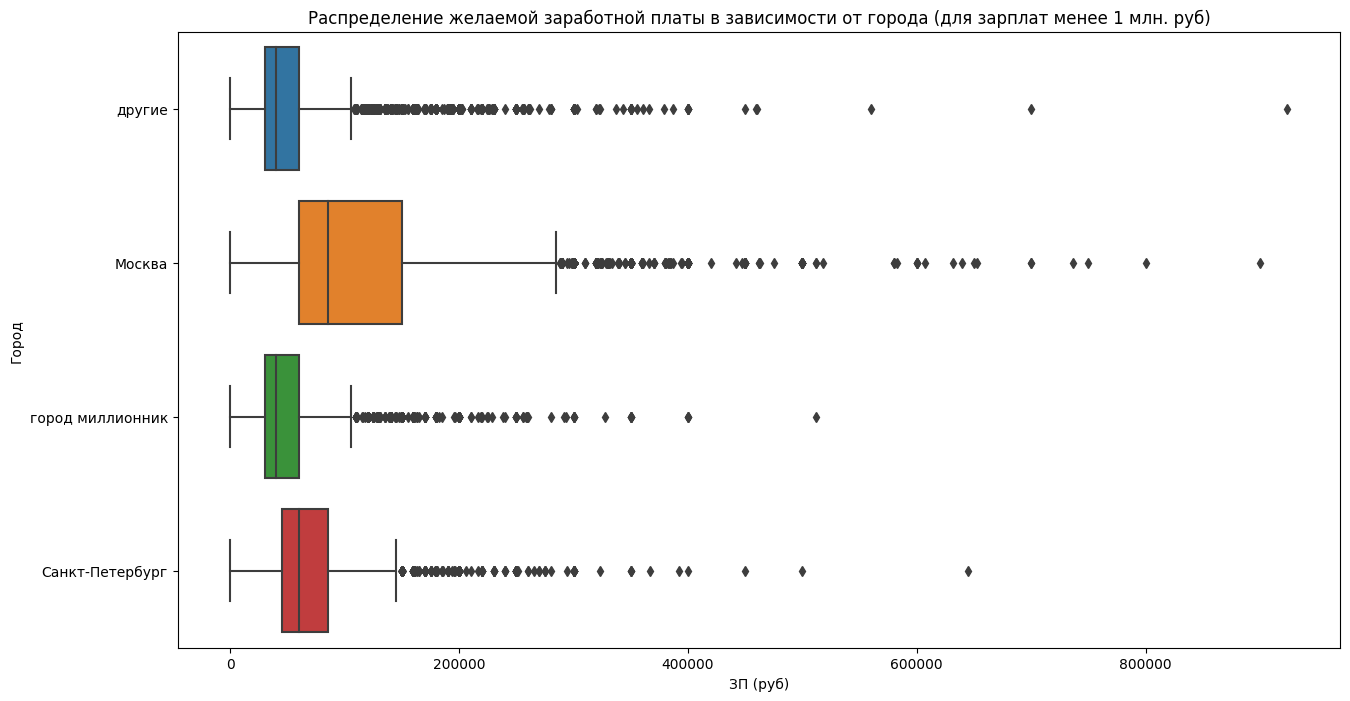

In [27]:
fig = plt.figure(figsize=(15, 8))
boxplot = sns.boxplot(
    data=money_df,
    x='ЗП (руб)',
    y="Город"    
)
boxplot.set_title('Распределение желаемой заработной платы в зависимости от города (для зарплат менее 1 млн. руб)')

## Распределение желаемой ЗП в зависимости от города. Выводы (Задание 5)

Как видно из построенных коробчатых диаграмм, наибольшая желаемая медианная зарплата присутсвует у соискателей в Москве. На втором месте по размеру желаемой медианной заработной платы находится Санкт-Петербург. Города-миллионники и другие города имеют примерно одинаковое положение медианы, что говорит о том, что соискатели из этих городов имеют примерно идентичные запросы. Также следует учесть, что желаемая зарплата большинства соискателей из Москвы больше, чем желаемая зарплата у людей из городов-миллионников. Как видно по телу коробчатой диаграммы для Москвы - минимальная желаемая заработная плата жителей Москвы (нижний квартиль) больший, нежели верхний квартиль для тел коробчатых диаграмм городов-миллионников и других городов. Несмотря на это наибольший по размеру выброс находится в категории "другие". Можно увидеть выброс в размере, примерно 920 тыс.рублей, что не характерно для выбросов желаемых зарплат Москвы и Санкт-Петербурга. Зарплаты более 100 тыс. рублей для всех городов, кроме Москвы, являются выбросами, тогда как выбросы для Москвы начинаются с примерно 300 тыс.рублей и более. Можно сделать вывод о том, что признак города очень сильно влияет на прогнозирование заработной платы, поэтому он должен обязательно учитываться при анализировании желаемых зарплат.

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

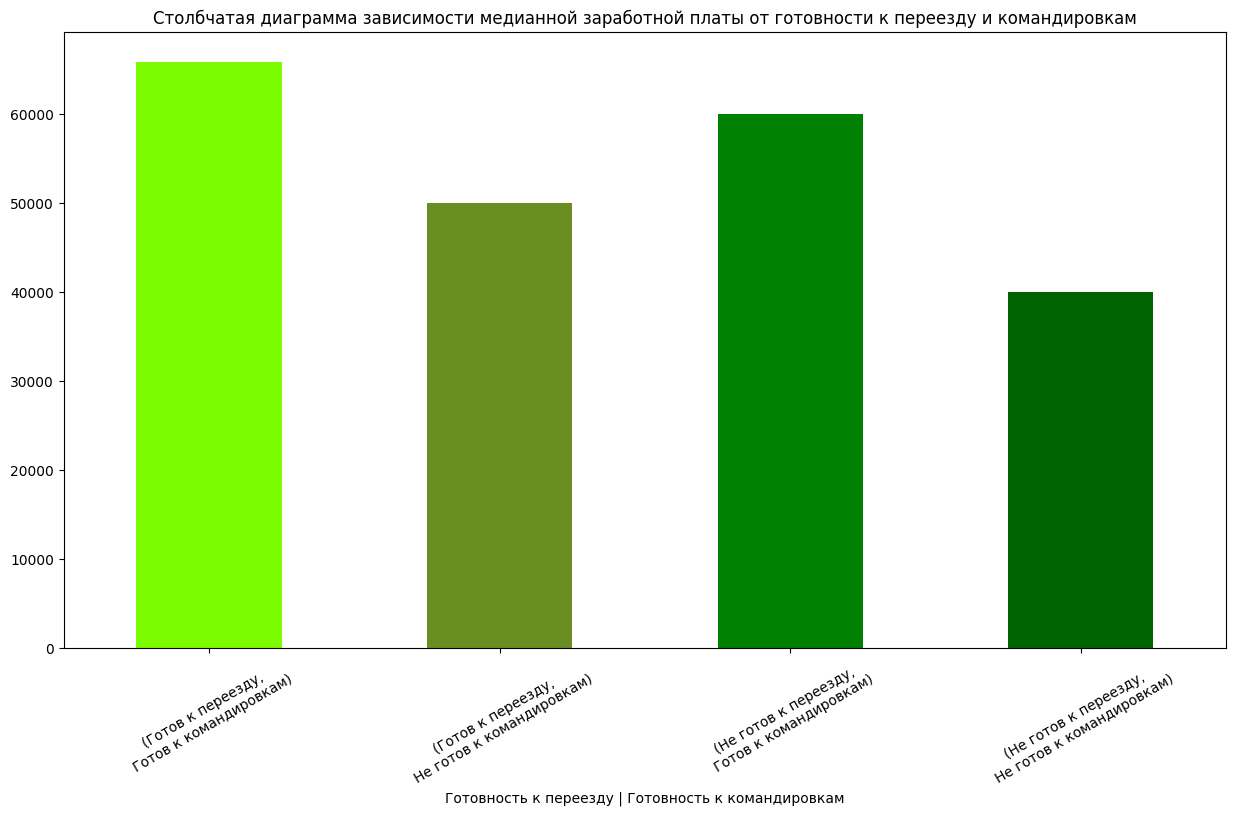

In [28]:
exercise6_data = hh_df.copy()
exercise6_data['Готовность к переезду'] = exercise6_data['Готовность к переезду'].replace(True, 'Готов к переезду')
exercise6_data['Готовность к переезду'] = exercise6_data['Готовность к переезду'].replace(False, 'Не готов к переезду')

exercise6_data['Готовность к командировкам'] = exercise6_data['Готовность к командировкам'].replace(True, '\nГотов к командировкам')
exercise6_data['Готовность к командировкам'] = exercise6_data['Готовность к командировкам'].replace(False, '\nНе готов к командировкам')

fig6_df = exercise6_data.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median()

fig, axes = plt.subplots(figsize=(15, 8))
figure = fig6_df.plot(
    kind='bar',
    color = ['lawngreen', 'olivedrab', 'green', 'darkgreen'],
    ax=axes
)
figure.xaxis.set_tick_params(rotation=30)
figure.set_title('Столбчатая диаграмма зависимости медианной заработной платы от готовности к переезду и командировкам', fontsize=12);
figure.set_xlabel('Готовность к переезду | Готовность к командировкам');


## Выводы по зависимости желаемой медианной ЗП от готовности к переезду и к командировкам (Задание 6)

Как видно из построенных графиков готовность к переезду и готовность к командировкам влияют на уровень желаемой заработной платы. Данная информация не является удивительной, поскольку соискатель вправе требовать больший оклад, при необходимости менять свое место жительства, или при обязанности периодически бывать в командировках. Так например видно, что люди не готовые ни к переезду, ни к командировкам имеют наименьший уровень желаемой ЗП. Люди не готовые к командировкам, но готовые к переезду имеют больший медианный желаемый оклад. Тем не менее большая часть соискателей оценивает необходимость бывать в командировках более высоко, нежели необходимость к переезду. Наибольшим уровенем желаемой медианной ЗП обладают соискатели готовые как к переездам, так и к командировкам (примерно 66.000 рублей). Данный фактор необходимо учитывать, при прогнозировании желаемой медианной ЗП для соискателя.

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

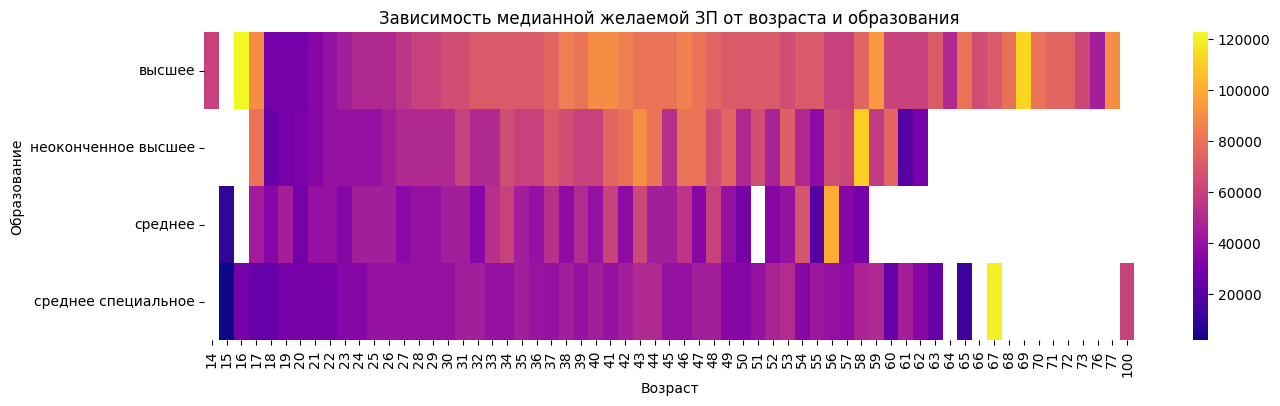

In [29]:
pivot = hh_df.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median'
)
fig = plt.figure(figsize=(15, 4))
heatmap = sns.heatmap(data=pivot, cmap='plasma')
heatmap.set_title('Зависимость медианной желаемой ЗП от возраста и образования');


## Выводы по зависимости медианной желаемой ЗП от возраста и образования (Задание 7)

На основе полученной тепловой карты достаточно легко обнаружить пробелы в данных, а также некоторые логические несоответствия. Во-первых, как видно по тепловой карте отсутствуют почти все значения желаемой ЗП для людей старше 63 лет и имеющие образование ниже высшего. Также особо выделяется возраст соискателя в 100 лет, который имеет среднее специальное образование. Помимо этого стоит учесть некоторые логические несостыковки. Например наличие у соискателя, возрастом 14 лет высшего образования (даже если предположить, что он закончил школу в формате экстерната за 5-6 лет, то ему должно быть 11-12 лет по окончании школы, следовательно вероятность того, что он будет иметь законченное высшее образование в возрасте 14 лет - почти равна 0).

По тепловой карте легко установить, что наиболее быстрый рост медианной ЗП по возрасту происходит у соискателей с высшим образованием. Так желаемая медианная ЗП у данной групы изменяется от 40 тыс. рублей для соискателей возрастом 20 лет - до 100-110 тыс. рублей для соискателей возрастом 40 лет. Для соискателей, имеющих среднее специальное образование кардинального роста медианной желаемой ЗП практически не происходит. Значения для данной группы не доходят до 100 тыс. рублей, не считая желаемой ЗП для 67 - летних людей данной группы, что скорее всего также можно отнести к выбросам, или неточной информации. Люди с неоконченным высшим образованием имеют чуть меньшую скорость роста медианной ЗП, относительно соискателей, имеющих высшее образование, тем не менее в данной группе также достаточно легко отследить рост медианной ЗП от возраста (отставание от соискателей с высшим образованием имеет величину равную 2-3 годам). Полная информация о всех видах желаемых медианных ЗП для всех возрастов и типов образования присутствует в группе от 18 до 50 лет. Чуть меньше данных о соискателях в возрасте от 51 до 62 лет. Остальная информация имеет достаточно большие пробелы и скорее всего непригодна для анализа.

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

In [30]:
import plotly.graph_objects as go

exercise8_data = hh_df.copy()
exercise8_data['Опыт работы (год)'] = exercise8_data['Опыт работы (месяц)']/12

x = np.arange(0, 101, 1)
def f(x):
    return x

fig = px.scatter(
    data_frame=exercise8_data,
    x = 'Возраст',
    y = 'Опыт работы (год)',
    width=1000,
    height=700
)
fig.add_trace(go.Scatter(y=f(x), mode="lines"))

fig.update_layout(title="Зависимость опыта работы в годах от возраста",
                  xaxis_title="Возраст соискателя",
                  yaxis_title="Опыт работы соискателя в годах")
fig.show()

fig.write_html('plotly/age_workexpierence_relationship.html')


## Вывод по диаграмме рассеяния, показывающую зависимость опыта работы в годах и возраста (Задание 8)

Как видно по построенному графику, б*о*льшая часть данных об опыте работы лежит ниже графика x\2 - где х - это возраст соискателя. Как видно по графику в большинстве случаев опыт работы примерно равен половине возраста. Тем не менее есть и исключения. Так например для выброса (человек возрастом 100 лет) опыт работы - менее 10 лет. Также есть некоторые выбросы, в которых значение опыта работы больше, или равно возрасту. Таких выбросов всего 7 штук. Также стоит указать, что в графике, а следовательно и в данных нет информации о соискателях возрастом более 80 лет (за исключением 1 - 100-летнего соискателя).

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


9. Построим диаграмму, показывающую зависимость наличия автомобиля от медианной заработной платы

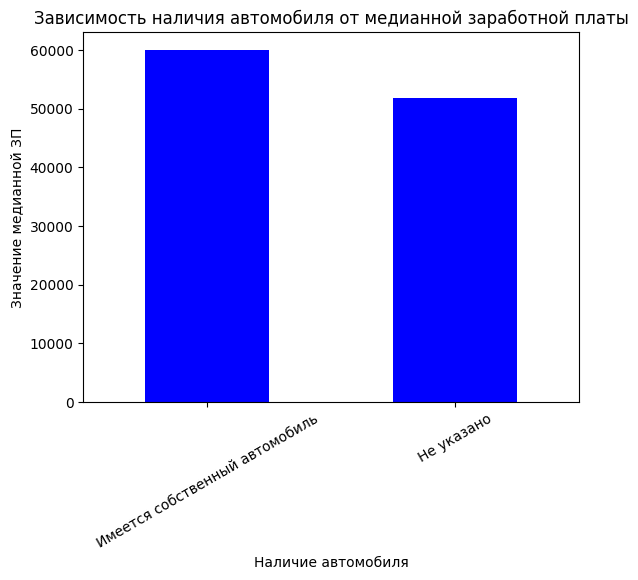

In [31]:
grafic9_data = hh_df.groupby(['Авто'])['ЗП (руб)'].median()

figure = grafic9_data.plot(
    kind='bar',
    color='blue'
);
figure.xaxis.set_tick_params(rotation=30)
figure.set_title('Зависимость наличия автомобиля от медианной заработной платы')
figure.set_xlabel('Наличие автомобиля');
figure.set_ylabel('Значение медианной ЗП');


## Выводы по зависимости наличия автомобиля от медианной ЗП (Задание 1 - дополнительное)

Как видно из построенного графика, показатель наличия автомобиля связан с желаемой медианной заработной платой. Если предположить, что те соискатели, которые не указали наличие у них автомобиля - не обладают таковым, то становится ясно, что обладатели более высокой медианной ЗП с большей вероятностью обладают автомобилем. Это достаточно просто объяснить с логической точки зрения: желание получать большую медианную зарплату, основано необходимости соискателя удовлетворять свои потребности. Наличие автомобиля делает необходимостью находить финансовые средства на его обслуживание, следовательно наличие автомобиля может являться триггером, указывающим на то, что соискатель будет требовать большую ЗП, или искать вакансию с большей заработной платой. 

10. Покажем распределение медианной желаемой заработной платы в зависимости от пола

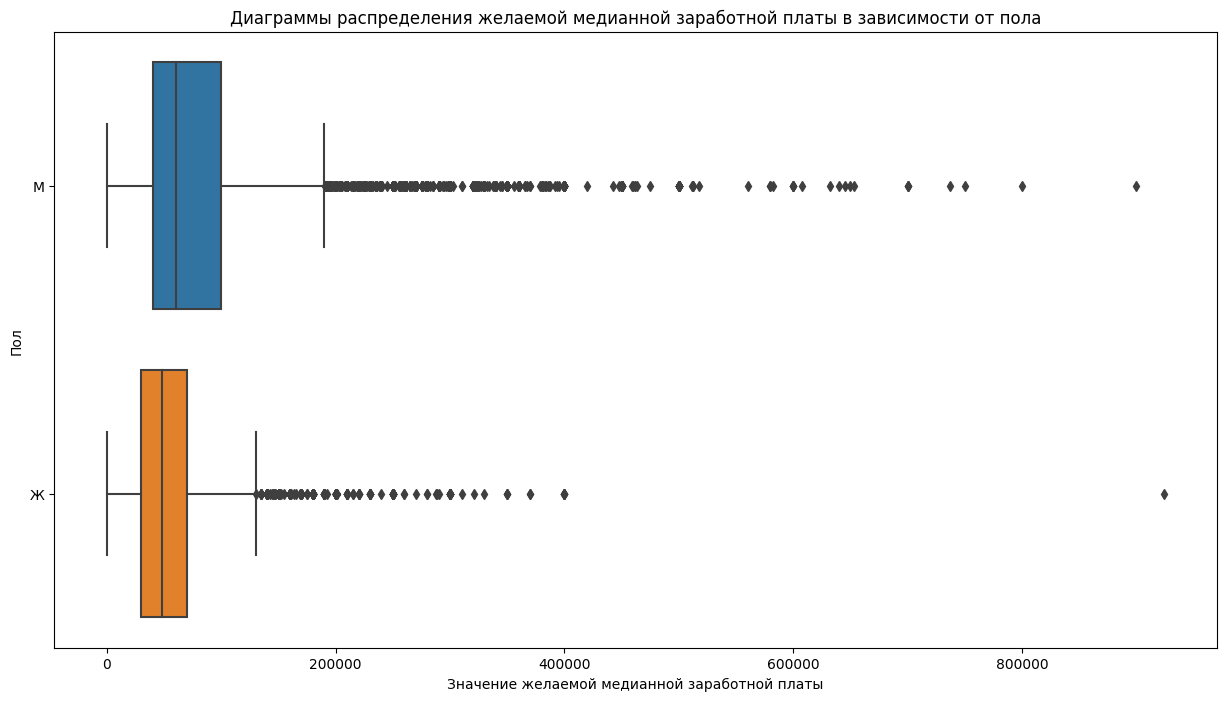

In [32]:
fig = plt.figure(figsize=(15, 8))
boxplot = sns.boxplot(
    data=money_df,
    x='ЗП (руб)',
    y='Пол'
)
boxplot.set_title('Диаграммы распределения желаемой медианной заработной платы в зависимости от пола')
boxplot.set_xlabel('Значение желаемой медианной заработной платы')
boxplot.set_ylabel('Пол');


## Выводы по распределению желаемой ЗП в зависимости от пола (Задание 2 - дополнительное)

Как видно из полученных коробчатых диаграмм, медианное значение желаемой заработной платы у мужчин больше, нежели у женщин. Также максимум среди желаемых зарплат для мужчин располагается правее, чем у женщин. Максимальная желаемая заработная плата мужчин, находящаяся в границах распределения - 200 тыс. рублей, в то время как у женщин этот показатель равен примерно 160 тыс. рублей. По графику видно, что наибольшее количество выбросов находится в графике для зарабатных плат мужчин, тем не менее максимальный выброс - значение в 924.000 рублей принадлежит женщине. В то же время в диаграмме для женского пола нет выбросов в диапазоне от 400.000 рублей до 924.000 рублей. В целом по строению тела коробчатой диаграммы для мужского и женского полов нетрудно сделать вывод, что большее число соискателей - мужчины, а не женщины.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [33]:
dupl_columns = list(hh_df.columns)
mask = hh_df.duplicated(subset=dupl_columns)
hh_duplicates = hh_df[mask]
print(f'Общее число дубликатов - {hh_duplicates.shape[0]}')

hh_dedupped = hh_df.drop_duplicates(subset=dupl_columns)
print(f'Общее число записей без дубликатов - {hh_dedupped.shape[0]}')

Общее число дубликатов - 161
Общее число записей без дубликатов - 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [34]:
null_data = hh_dedupped.isnull().sum()
display(null_data[null_data > 0])

Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [35]:
hh_dedupped = hh_dedupped.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
values = {
    'Опыт работы (месяц)': hh_dedupped['Опыт работы (месяц)'].median()
}
hh_dedupped = hh_dedupped.fillna(values)

print('Среднее значение в столбце "Опыт работы (месяц)"', round(hh_dedupped['Опыт работы (месяц)'].mean()))

Среднее значение в столбце "Опыт работы (месяц)" 114


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [36]:
mask1 = hh_dedupped['ЗП (руб)'] > 1000000
mask2 = hh_dedupped['ЗП (руб)'] < 1000
thresh_data = hh_dedupped[mask1 | mask2]
print(f'Число выбросов, содержащих зарплату более 1 млн. рублей, либо менее 1000 рублей - {thresh_data.shape[0]}')

hh_dedupped = hh_dedupped.drop(thresh_data.index, axis=0)

Число выбросов, содержащих зарплату более 1 млн. рублей, либо менее 1000 рублей - 89


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [37]:
mask = hh_dedupped['Опыт работы (месяц)']/12 > hh_dedupped['Возраст']
thresh_age_data = hh_dedupped[mask]
print(f'Число выбросов, в которых опыт работы превышал возраст - {thresh_age_data.shape[0]}')

hh_dedupped = hh_dedupped.drop(thresh_age_data.index, axis=0)

Число выбросов, в которых опыт работы превышал возраст - 7


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

Число выбросов по возрасту - 3
Итоговое число записей в нашем Датафрейме, после всех очисток - 44482


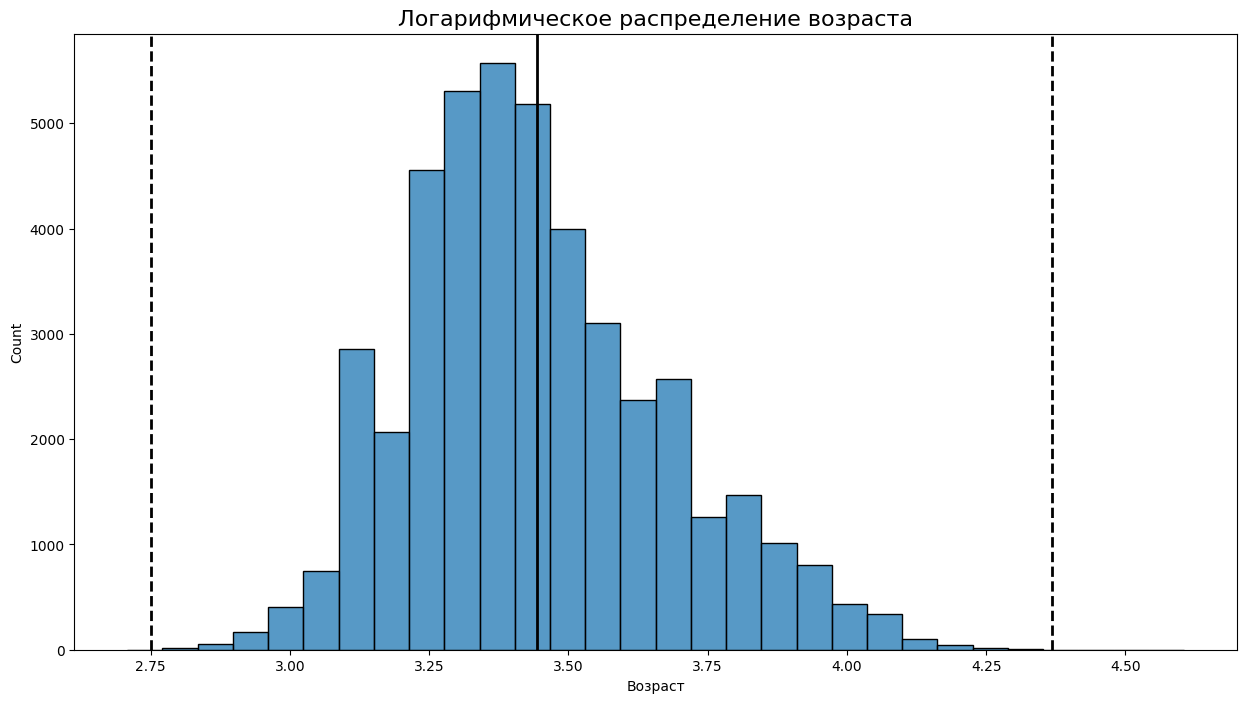

In [38]:
fig, axes = plt.subplots(figsize=(15, 8))

log_age = np.log(hh_dedupped['Возраст'])
histplot = sns.histplot(log_age, bins=30, ax=axes)
histplot.axvline(log_age.mean(), color='k', lw=2);
histplot.axvline(log_age.mean()+ 4 * log_age.std(), color='k', ls='--', lw=2);
histplot.axvline(log_age.mean()- 3 * log_age.std(), color='k', ls='--', lw=2);
histplot.set_title('Логарифмическое распределение возраста', fontsize=16)


def outliers_z_score_mod(data, feature, log_scale=False, left=3, right=3):
    if log_scale:
        x = np.log(data[feature])
    else:
        x=data[feature]
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left * sigma
    upper_bound = mu + right * sigma
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned



outliers, cleaned_hh_df = outliers_z_score_mod(data=hh_dedupped, feature='Возраст', log_scale=True, left=3, right=4)

print(f'Число выбросов по возрасту - {outliers.shape[0]}')

print(f'Итоговое число записей в нашем Датафрейме, после всех очисток - {cleaned_hh_df.shape[0]}')

## Вывод по графику логарифмического распределения возраста

Как видно по построенному графику логарифмическое распределение ассиметрично в правую сторону, поскольку для того, чтобы получить более полные данные нам пришлось изменить правую границу на 1 сигму в большую сторону. Также число "корзин", содержащих значения с правой стороны больше, нежели слевой (14 справа против 10 слева).